In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
citi_bike_df = pd.read_sql_table('cb', 'sqlite:///G:\My Drive\Coding\Metis\EDA\Project\Data\citi_bike.db')
citi_bike_march = pd.read_sql_table('202103-citibike-tripdata', 'sqlite:///G:\My Drive\Coding\Metis\EDA\Project\Data\citi_bike.db')
citi_bike_may = pd.read_sql_table('202105-citibike-tripdata', 'sqlite:///G:\My Drive\Coding\Metis\EDA\Project\Data\citi_bike.db')

In [3]:
citi_bike_df=pd.concat([citi_bike_df,citi_bike_march,citi_bike_may], ignore_index=True)

In [4]:
citi_bike_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,7099F9531C9DA16D,docked_bike,2021-04-28 17:27:24,2021-04-28 17:34:31,DeKalb Ave & Hudson Ave,Douglass St & 4 Ave,member
1,EDC6F1B1A69A7863,docked_bike,2021-04-27 17:28:02,2021-04-27 17:33:07,E 47 St & Park Ave,W 52 St & 6 Ave,member
2,431A76830E10408A,docked_bike,2021-04-28 18:05:19,2021-04-28 18:10:48,E 47 St & Park Ave,W 52 St & 6 Ave,member
3,C00248A0ADC009FA,docked_bike,2021-04-20 21:35:47,2021-04-20 21:56:31,Irving Ave & DeKalb Ave,Division Ave & Hooper St,casual
4,BE78810D746EE516,docked_bike,2021-04-30 00:34:54,2021-04-30 01:03:29,3 Ave & E 112 St,E 115 St & Lexington Ave,casual
...,...,...,...,...,...,...,...
6322923,766BB4E17F05DBB4,docked_bike,2021-05-26 20:48:14,2021-05-26 21:02:01,W 25 St & 6 Ave,10 Ave & W 14 St,member
6322924,3A74372C4A83AF31,docked_bike,2021-05-22 16:28:54,2021-05-22 16:43:55,W 25 St & 6 Ave,10 Ave & W 14 St,member
6322925,8FF3997F7C47E8FA,docked_bike,2021-05-12 13:46:29,2021-05-12 13:54:12,E 4 St & 2 Ave,Canal St & Rutgers St,member
6322926,FFB1C29E91CC7253,docked_bike,2021-05-08 00:15:34,2021-05-08 00:25:19,Lewis Ave & Decatur St,Central Ave & Woodbine St,member


In [5]:
citi_bike_df['started_at'] = pd.to_datetime(citi_bike_df.started_at)
citi_bike_df['ended_at'] = pd.to_datetime(citi_bike_df.ended_at)

In [6]:
citi_bike_df['started_at'] = citi_bike_df['started_at'].dt.date
citi_bike_df['ended_at'] = citi_bike_df['ended_at'].dt.date

In [7]:
citi_bike_df.sort_values(["started_at", "ended_at"], 
                          inplace=True, ascending=False)
citi_bike_df.drop_duplicates(inplace=True)

In [8]:
citi_bike_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
4362827,6E46DC8E54584295,docked_bike,2021-05-31,2021-06-04,Allen St & Rivington St,Sullivan St & Washington Sq,member
5655393,99F2F5F958155D81,docked_bike,2021-05-31,2021-06-04,Prospect Park SW & 16 St,11 Ave & Prospect Ave,casual
4448869,07FC38EE52C64386,docked_bike,2021-05-31,2021-06-02,Plaza Dr & W 170 St,None,casual
5129914,722C1F1967D7978F,docked_bike,2021-05-31,2021-06-02,E 48 St & 3 Ave,1 Ave & E 94 St,casual
3609456,0AFBD5E677AA8DC6,docked_bike,2021-05-31,2021-06-01,E 1 St & 1 Ave,W 13 St & 5 Ave,casual


In [9]:
bike_daily = (citi_bike_df
              .groupby(["started_at"])['ride_id']
              .agg('count').reset_index())

In [10]:
bike_daily.rename(columns = {"started_at":'date','ride_id':'rides_total'},inplace = True)
bike_daily

,date,rides_total
0,2021-03-01,34575
1,2021-03-02,32100
2,2021-03-03,50122
3,2021-03-04,40247
4,2021-03-05,36338
...,...,...
87,2021-05-27,112627
88,2021-05-28,62800
89,2021-05-29,30059
90,2021-05-30,17684


In [16]:
bike_daily.rides_total.mean()

68727.47826086957

In [11]:
bike_daily.date=pd.to_datetime(bike_daily.date)

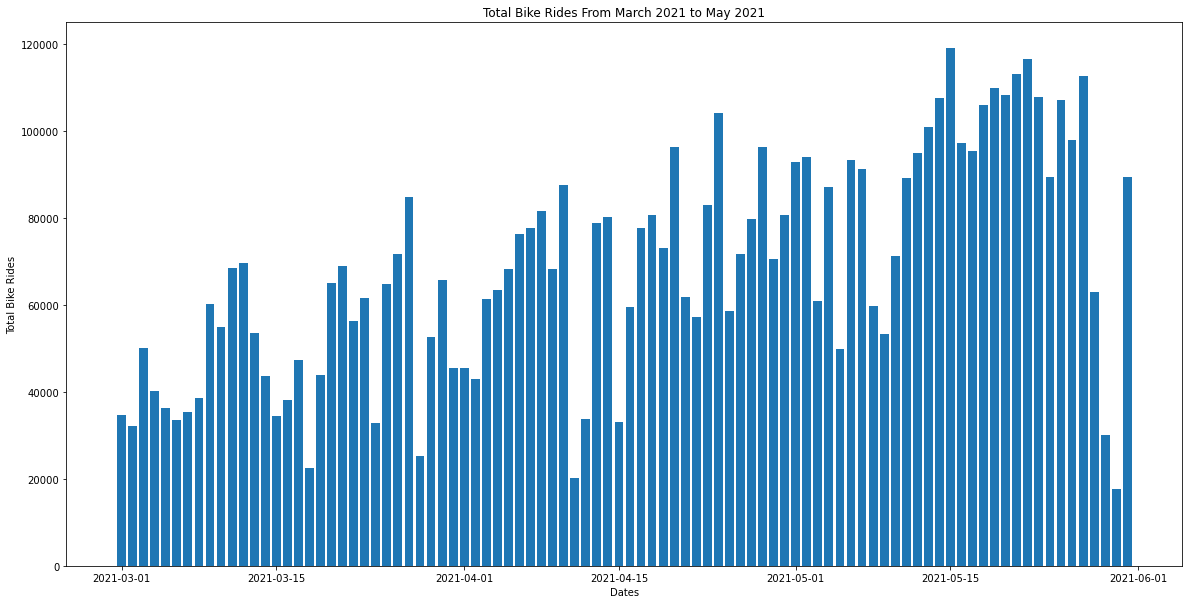

In [12]:
plt.figure(figsize=(20,10))
plt.bar(bike_daily.date, bike_daily.rides_total)
plt.title('Total Bike Rides From March 2021 to May 2021')
plt.xlabel('Dates')
plt.ylabel('Total Bike Rides')
plt.show()

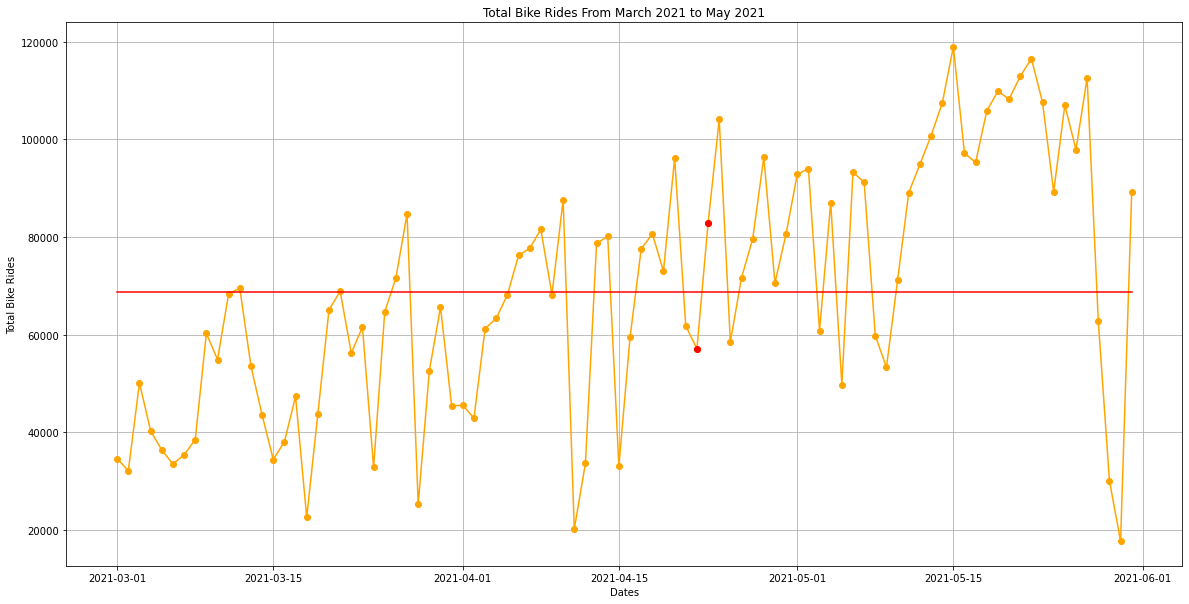

In [22]:
plt.figure(figsize=(20,10))
plt.plot(bike_daily.date, bike_daily.rides_total,'-o', color = 'orange')
avg = [68727.47826086957 for i in bike_daily.date]
plt.plot(bike_daily.date, avg, color='red')
plt.plot(bike_daily.date[bike_daily.date == '2021-04-22'], 
         bike_daily[bike_daily.date == '2021-04-22'].rides_total, 'o',label ='2021-04-22',color = 'red')
plt.plot(bike_daily.date[bike_daily.date == '2021-04-23'], 
         bike_daily[bike_daily.date == '2021-04-23'].rides_total, 'o',label='2021-04-23',color = 'red')
plt.title('Total Bike Rides From March 2021 to May 2021')
plt.xlabel('Dates')
plt.ylabel('Total Bike Rides')
plt.grid()
plt.show()

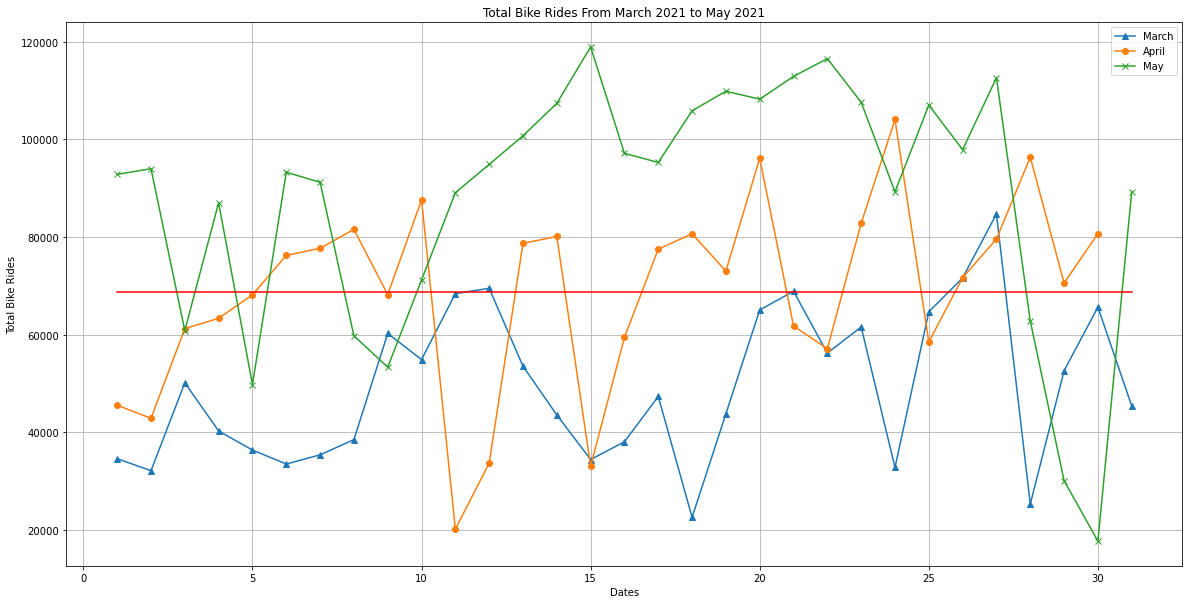

In [27]:
may = bike_daily['date'].dt.month==5
march = bike_daily['date'].dt.month==3
april = bike_daily['date'].dt.month==4
plt.figure(figsize=(20,10))
plt.plot(bike_daily.date[march].dt.day, bike_daily.rides_total[march],'-^',label='March')
plt.plot(bike_daily.date[april].dt.day, bike_daily.rides_total[april],'-o',label='April')
plt.plot(bike_daily.date[may].dt.day, bike_daily.rides_total[may],'-x',label='May')
avg = [68727.47826086957 for i in bike_daily.date[may].dt.day]
plt.plot(bike_daily.date[may].dt.day, avg, color='red')
plt.title('Total Bike Rides From March 2021 to May 2021')
plt.xlabel('Dates')
plt.ylabel('Total Bike Rides')
plt.legend()
plt.grid()
plt.show()